In [12]:
# Importing spotipy, which is a lightweight Python library for the Spotify Web API
import spotipy

# this allows us to see a users playlist - it requires authentication via oauth 
import spotipy.util as util

# This is Spotipy's authenticaion module - used for authenticating the user.
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyClientCredentials

# Our comprehensive library for creating some of our project visualisations.
import matplotlib.pyplot as plt

# Pandas is a Python library for data manipulation and analysis
import pandas as pd

# NumPy is our Python library, that allows us to work with for large, multi-dimensional arrays and matrices, it also has high-level math functions
import numpy as np

# Requests is an Apache2-based HTTP library. It will allow us to send HTTP/1.1 requests using Python
import requests
# Time module provides various time-related functions
import time

# The Spotify API returns requests as JSON files. This allows us to read and work with JSON.
import json

# Scipy contains a large number of probability distributions as well as library of statistical functions.
import scipy.stats as st

# Part of the Scipy library, it allows us to calculate a linear least-squares regression for two sets of measurements.
from scipy.stats import linregress 

# Allows us thecapability to “pretty-print” arbitrary Python data structures in a form which can be used as input to the interpreter
from pprint import pprint

#Gives us the "array" function so that we can randomly select tracks
import array

#Imports linear regression function and R^2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#------

#Get credentials
from config import cid
from config import secret
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)



In [13]:
#Read csv
spot_csv="new_genre.csv"
spot_df=pd.read_csv(spot_csv)

In [14]:
#Create new column for seconds
spot_df["Seconds"]=spot_df["Duration_ms"]/1000

In [15]:
#Grouped dataframe
mean_df=spot_df.groupby("Genre")
mean_df.mean()

,Genre,Track Name,Track ID,Popularity,Loudness,Tempo,Duration_ms,Energy,Key,Instrumentalness,Speechiness,Valence,Danceability
0,acoustic,Fast Car (feat. Kina Grannis),6UluzJStuOfZEQXTP3w6R9,1,-9.790,103.087,304293,0.2550,10,0.00000,0.0278,0.5000,0.6600
1,acoustic,Anna Sun - Live From Spotify NYC,3Syg4GwsW6yFeTbZUqWvYS,37,-10.246,139.473,287040,0.6560,10,0.00000,0.1270,0.5580,0.5420
2,acoustic,"Valerie - Live At BBC Radio 1 Live Lounge, Lon...",1fRYJWQZw6IGZU6u3rpqBO,2,-5.736,95.994,230787,0.3710,5,0.00000,0.0352,0.6460,0.7580
3,acoustic,If It Means a Lot to You,6J7cSyvSCnPwv3vqHchEfL,68,-8.158,126.996,243227,0.5360,10,0.00000,0.0279,0.4400,0.5840
4,acoustic,When I Held Ya,7bcHBD27hxkK5aSXjWOysM,46,-6.108,153.939,209280,0.6450,11,0.00000,0.0372,0.4180,0.4250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,world-music,Langue Muette,4WkP5fUYJ5QVEmT7Ob2nST,0,-23.299,112.218,211905,0.0174,9,0.90100,0.0512,0.1540,0.5310
12296,world-music,Sabu Yerkoy,27i5E9ok44Ymh7jtmN0OAy,0,-12.630,81.317,248987,0.3640,4,0.06580,0.0333,0.6970,0.5990
12297,world-music,Yègellé Tezeta,6UTg8n7UkdHq77b1ToTVA0,4,-13.539,125.597,194293,0.2330,3,0.74600,0.0414,0.7780,0.8390
12298,world-music,Man & Woman's Best Friends,6UfkNrMWg9UuPmzlbmACGD,15,-22.726,78.340,522043,0.1060,1,0.75900,0.0463,0.0388,0.0763


In [16]:
#defining a regression function
def reg(d,i):
    dataframe= spot_df[[d,i]]
    dataframe.plot.scatter( x=[d] , y=[i])
    
    x= dataframe[[d]]
    y= dataframe[[i]]
    
    model=LinearRegression()
    model.fit(x,y)
    beta=model.coef_
    alpha=model.intercept_
    yline=model.predict(x)
    plt.scatter(x,y)
    plt.plot(x, yline,"r")
    Rsquare=r2_score(y, yline)


    #plt.title(f"{a} by {i}]")
    #plt.xlabel("Distance From Equator")
    #plt.ylabel(a)

    plt.show()

#----Display coeficient, intercept, and R^2
    print(f"\u03B2 ={beta}")
    print(f"\u03B1 ={alpha}")
    print(f"R^2={Rsquare}")
    
#----Print an analysis   
#    what_crease=[]
#    direction=[]
#    IVdir="greater"
#    DVdir=[]
#    if beta<0:
#        what_crease="decrease"
#        direction="negative"
#        DVdir="lower"
#    elif beta==0:
#        what_crease="increase"
#        direction="lack of any"
#        DVdir="no change"
#    else:
#        what_crease="increase"
#        direction="positive"
#        IVdir="greater"
#        DVdir="higher"
    


    
    #print(f"\nThis chart is displaying the relationship between {a.lower()} and the distance a city ")
    #print(f"is from the equator. The regression coefficient is {beta}, a {direction} association.")
    #print(f"This means that for every one degree increase in latitude a city is from ")
    #print(f"the equator, the model predicts a {abs(beta)} unit {what_crease} in {a.lower()}. \n")
    #print(f"In other words, {IVdir} distances from the equator are associated with {DVdir} {a.lower()}.\n")


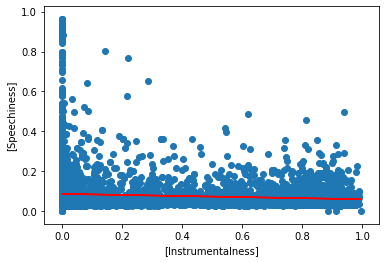

β =[[-0.02700725]]
α =[0.08560165]
R^2=0.0063378577230595035


In [17]:
reg("Instrumentalness", "Speechiness")

In [18]:
dropzero_df=spot_df.loc[spot_df["Instrumentalness"]>0]
dropzero_df=dropzero_df.loc[spot_df["Speechiness"]>0]

In [19]:
def regzero(d,i):
    
    dataframe= dropzero_df[[d,i]]
    dataframe.plot.scatter( x=[d] , y=[i])
    
    x= dataframe[[d]]
    y= dataframe[[i]]
    
    model=LinearRegression()
    model.fit(x,y)
    beta=model.coef_
    alpha=model.intercept_
    yline=model.predict(x)
    plt.scatter(x,y)
    plt.plot(x, yline,"r")
    Rsquare=r2_score(y, yline)


    #plt.title(f"{a} by {i}]")
    #plt.xlabel("Distance From Equator")
    #plt.ylabel(a)

    plt.show()

#----Display coeficient, intercept, and R^2
    print(f"\u03B2 ={beta}")
    print(f"\u03B1 ={alpha}")
    print(f"R^2={Rsquare}")
    

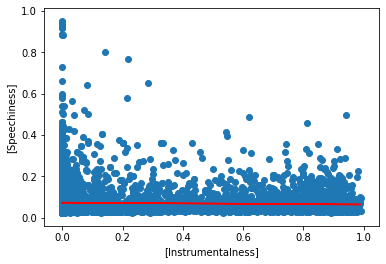

β =[[-0.00910186]]
α =[0.07239583]
R^2=0.0019802893871927463


In [20]:
regzero("Instrumentalness", "Speechiness")

In [21]:
dropzero_df.head()

,Genre,Track Name,Track ID,Popularity,Loudness,Tempo,Duration_ms,Energy,Key,Instrumentalness,Speechiness,Valence,Danceability
5,acoustic,Live Tomorrow,3eOYmWvienEIgHJFAWE3ZD,47,-9.745,112.030,215906,0.426,1,0.000091,0.0293,0.613,0.671
7,acoustic,First Defeat,2raqz5ptmCClo0QXWK6zkW,0,-11.243,144.411,243773,0.214,5,0.002100,0.0298,0.229,0.519
8,acoustic,Polly,7AUwhTIuxBn7Os76FPoIz7,1,-11.997,115.048,196394,0.388,11,0.000119,0.0365,0.429,0.615
9,acoustic,Wonderwall,7m2VsHmjyXZegtndWPgxOw,4,-12.608,157.040,248280,0.220,7,0.003980,0.0352,0.301,0.321
10,acoustic,Crosses,5gf6t8j49qayhwrnd05uLI,1,-9.945,134.631,161840,0.370,11,0.023500,0.0295,0.318,0.666


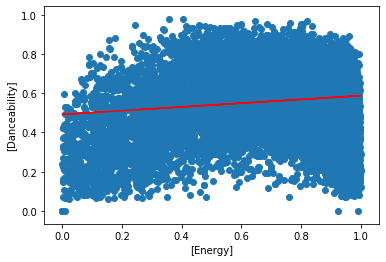

β =[[0.0956328]]
α =[0.49179191]
R^2=0.018611449547352832


In [27]:
reg("Energy", "Danceability")

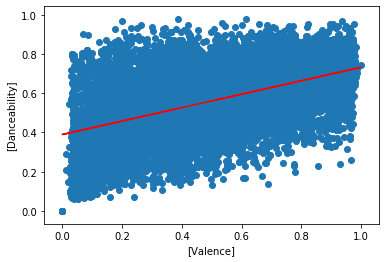

β =[[0.3427582]]
α =[0.38941825]
R^2=0.26880449041839116


In [28]:
reg("Valence", "Danceability")